# Final Project: Data Viz
Eliz Yanik

This past summer I had an internship with Veribase. I was given this dataset of some pharmaceutical company that uses their software. I used this data to practice working with numpy and pandas. Now for my final project I am going to create visualizations to help understand the consumer data better and possibly come up with an algorithm for churn analysis. This was the software's main goal to help the companies to have analytics in real time. 
Churn analysis is the process of using current data to determine future action. A good example is the relationship one has with their cable provider. Usually when you call to cancel the service they try to entice you with a better offer to retain your business. If you had the amount of times the customer used their service and for which shows you can get a better idea of how to keep those customers. 
This is my projects ultimate goal is to find a pattern in weekly sales reports where the customer ID, week ID and both the order and quantity count is tracked.
No one has directly worked with this data at all so any observations I make are novel ones.

In [1]:
import vizCode

sales_df = vizCode.createDf("WeeklySalesReport.csv")
vizCode.dataOveriew(sales_df)

Overview of given file:
Number of rows:  281215
Number of features: 4
Data Features:
['CONTACT_ID', 'WEEK_ID', 'ORDER_COUNT', 'QUANTITIY_COUNT']
Missing values: 0
Unique values:
CONTACT_ID         22610
WEEK_ID              108
ORDER_COUNT          101
QUANTITIY_COUNT     1824
dtype: int64


First Mask to look at the data in chunks to get a better idea of behavior as from prior analysis it was shown to have a trend of weeks on end without any sales. The mask will help to isolate and only look at weeks that have sales data. The weeks go from 202127 to 202328. This is a range of 201 weeks but only 108 unique week_id's are seen therefore half the time there are no orders that week. More interestingly the weeks without sales are mostly grouped near each other which makes masking the most sense to chunk the data and get a better picture. Below the code creates three new data files split from the original to remove unused weeks.

In [2]:
sales_df1, sales_df2, sales_df3 = vizCode.applyWeekMasks(sales_df)

Scatter plot above three dataframes, and in order to see the activity of each individual period they are each colored separately. These functions as well as all other ones used in this project notebook are in this folder under vizCode for cleanliness. As there is no outside knowledge other than what is in the attatched csv file there is a lot of assumptions to be made such that the company only allows for customer orders during specific weeks of each year. One surefire way to predict churn analysis would be to send interest forms to associated customers to entice them into ordering prior to the opening of sales.

/workspaces/2024-spring-final-project/vizCode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df1['WEEK_SEQ'] = sales_df1['WEEK_ID'].map(week_map)
/workspaces/2024-spring-final-project/vizCode.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df2['WEEK_SEQ'] = sales_df2['WEEK_ID'].map(week_map)
/workspaces/2024-spring-final-project/vizCode.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

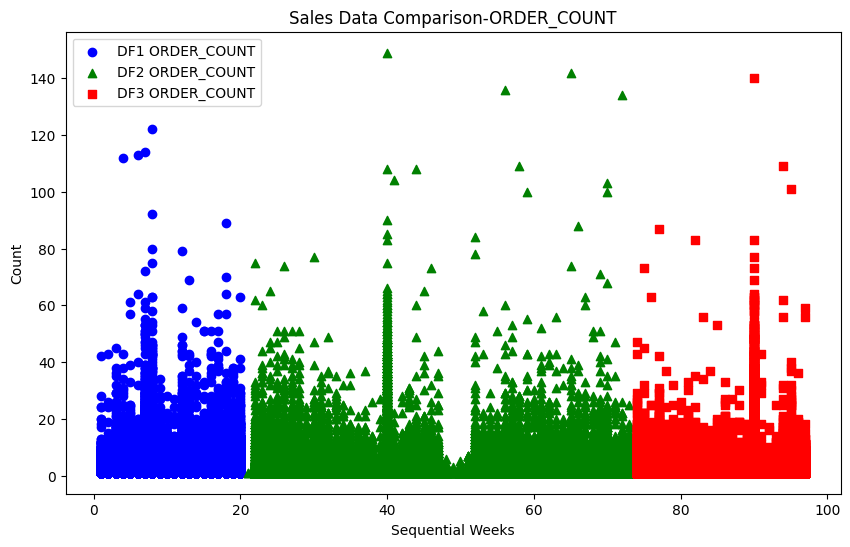

/workspaces/2024-spring-final-project/vizCode.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df1['WEEK_SEQ'] = sales_df1['WEEK_ID'].map(week_map)
/workspaces/2024-spring-final-project/vizCode.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df2['WEEK_SEQ'] = sales_df2['WEEK_ID'].map(week_map)
/workspaces/2024-spring-final-project/vizCode.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

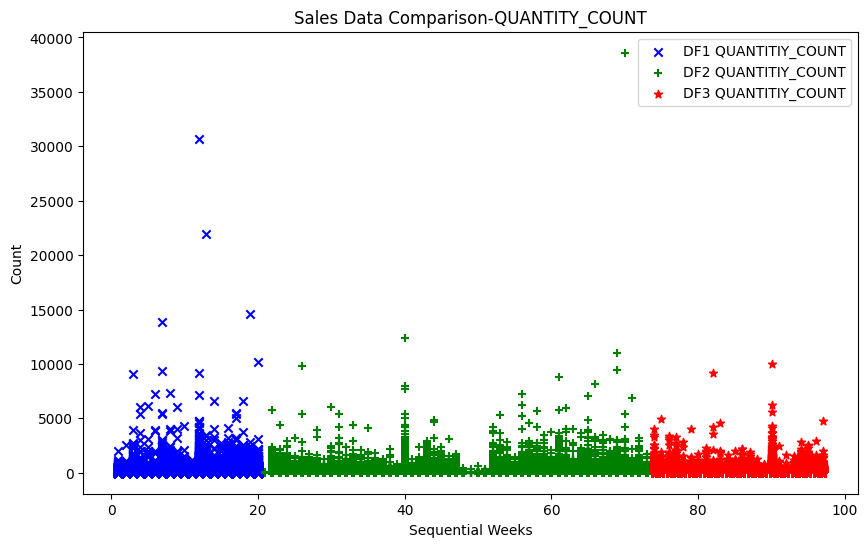

In [3]:
vizCode.plotOrderCount(sales_df1, sales_df2, sales_df3)
vizCode.plotQuantityCount(sales_df1, sales_df2, sales_df3)

Volume ordering is analyzed by creating new dataframes from the originals that replaces the quantity and count columns with a singular volume column instead. Once we have these new dataframes we can now plot them against weeks to see if that gives more insight into the sales totals. Below the graph has shown us that there seems to be a majority of the orders being in smaller volume from each customer per week. Based on the findings it suggests a fourier analysis.

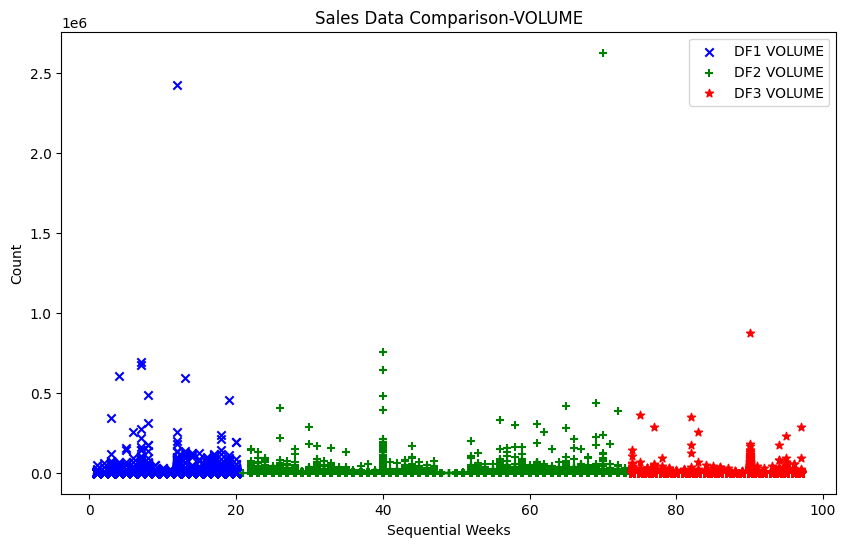

In [4]:
volume_df1 = vizCode.add_volume_column(sales_df1)
volume_df2 = vizCode.add_volume_column(sales_df2)
volume_df3 = vizCode.add_volume_column(sales_df3)
vizCode.plotVolumeCount(volume_df1, volume_df2, volume_df3)

A fast fourier transform aka FFT pulls the underlying pattern in the data so we are able to see more on trends. Being able to see patterns is very important in order to possibly train a neural network in the future to possibly aid the churn analysis. The below results are remarkable, we see that there is a SIGNIFICANT amout of sales that seems to be coming from a singular customer and the rest of the customers are relatively around the same amount but it is hard to tell with the outliers. A great way to think about the churn analysis algorithm is how much weight each relative customer has. Although they made a few significant purchases in a week that may be due to the fact that they maybe only order once per period of each dataframe. Another thing that looked interesting to me is how each of the chunks behave a little differently. This would make coming up with a churn algorithm very difficult and makes me think a machine learning algorithm for churn might be a better approach. This would mean that the algorithm will have to learn over the course of each period and adjust throughout as well rather than coming up with an algorithm before hand for each period as it would not be accurately predicting. 

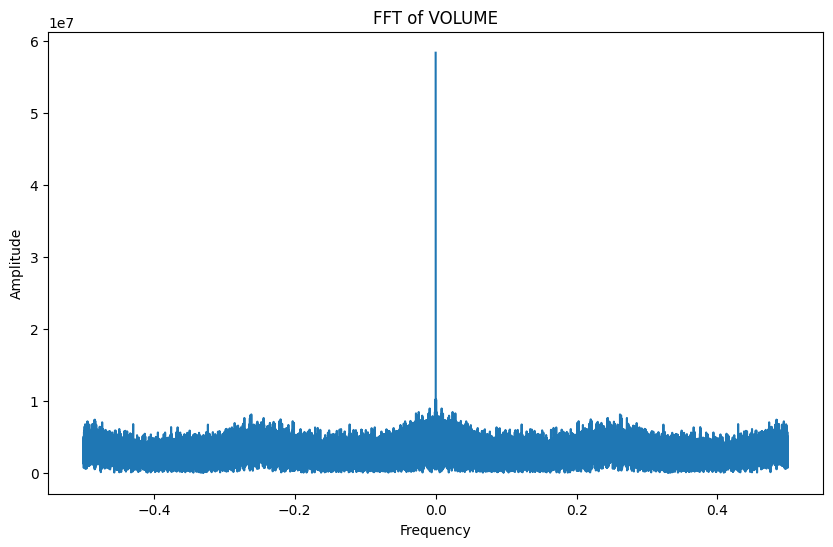

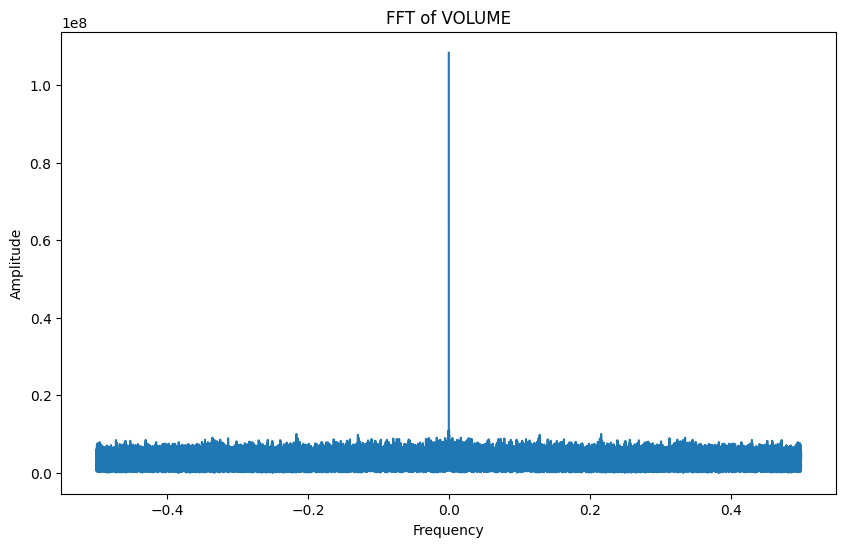

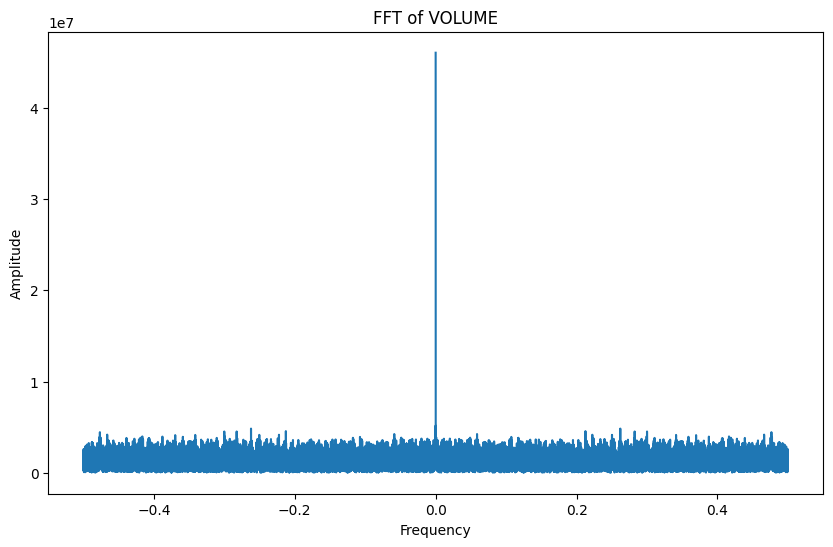

(array([ 0.00000000e+00,  1.49765617e-05,  2.99531234e-05, ...,
        -4.49296850e-05, -2.99531234e-05, -1.49765617e-05]),
 array([ 4.60486720e+07-5.82076609e-10j, -6.44618186e+05+1.01120233e+06j,
         3.71461487e+06+3.60113424e+06j, ...,
        -4.39135760e+04+9.05805026e+05j,  3.71461487e+06-3.60113424e+06j,
        -6.44618186e+05-1.01120233e+06j]))

In [5]:
vizCode.perform_fft(volume_df1)
vizCode.perform_fft(volume_df2)
vizCode.perform_fft(volume_df3)

Since it seems that one customer seems to be creating quite a bit of a splash it seems more focus on a large volume customer throughout each period is needed to see how behavior. This enforces the fact that the behavior of individual customers is a bit indeterminant so in order to move forward to be able to train a machine model more sales periods would be needed in order to get something that works. If there is more data available even just within the periods here then there would be more confidence in a machine learning algorithm or maybe a pca analysis but given the data present there is not much more to do in terms of a churn algorithm being created until more data can be retreived in the future.

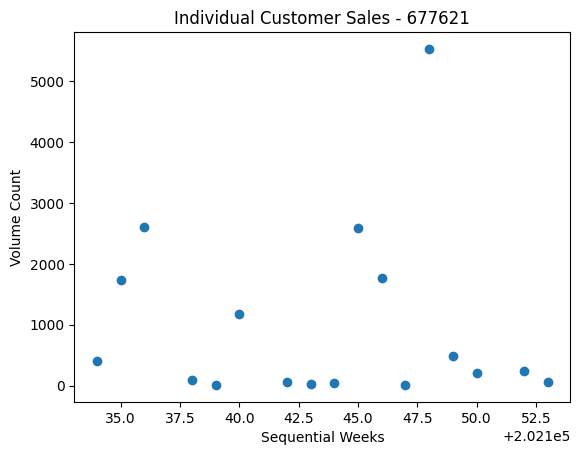

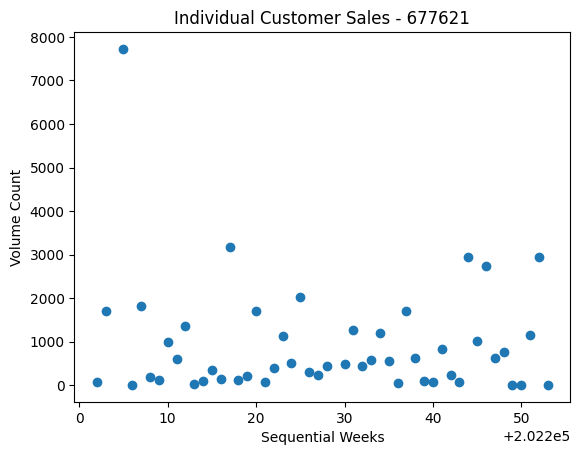

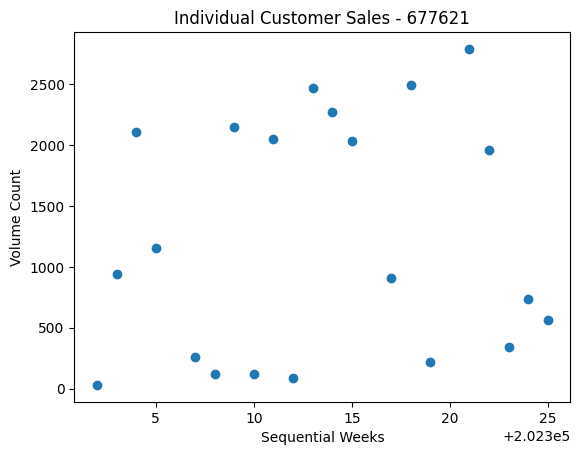

,CONTACT_ID,WEEK_ID,VOLUME,WEEK_SEQ
160263,677621,202302,30,74
160264,677621,202303,944,75
160265,677621,202304,2106,76
160266,677621,202305,1152,77
160267,677621,202307,260,79
160268,677621,202308,120,80
160269,677621,202309,2145,81
160270,677621,202310,120,82
160271,677621,202311,2050,83
160272,677621,202312,90,84


In [6]:
vizCode.oneCust(volume_df1, 677621)
vizCode.oneCust(volume_df2, 677621)
vizCode.oneCust(volume_df3, 677621)

In conclusion although the main goal of creating a churn analysis out of this data in order to predict future trends, this analysis did unveil future steps to acheive this goal. There was a few interesting finds, was expecting a bit more of a trend where it would be possible to fit to a polynomial but unfortunately that doesn't seem to be the case. Very surprising find with the FFT on the first chunk of the data as it seems to have a sinosodal motion which is very different from what was seen for the second adn third chunks. In the future in more data or a more detailed version of current data cannot be attained then it would be a good next step to maybe group customer sales by month in to see if there is a bit more of a trend to be found. Results led to a clear method of machine learning would be best to do a churn analysis but data is not sufficient to train such model as of now.